In [1]:
import tensorflow as tf
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt

In [2]:
dataset=tf.keras.preprocessing.image_dataset_from_directory(
    "plants",
    color_mode='rgb',
    batch_size=32,
    image_size=(256, 256),
    shuffle=True,
)

Found 2152 files belonging to 3 classes.


In [3]:
class_names=dataset.class_names
class_names

['Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy']

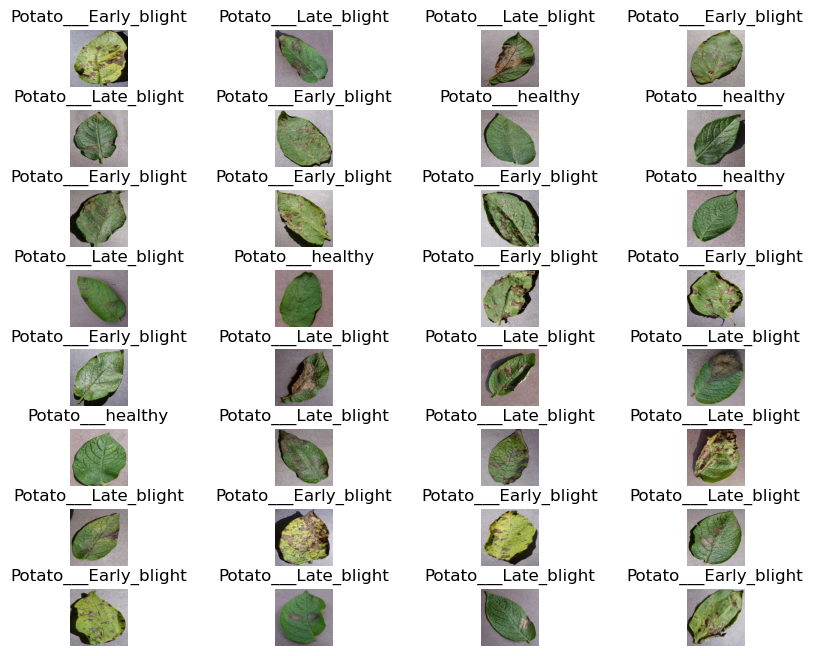

In [4]:
plt.figure(figsize=(10,8))
plt.subplots_adjust(hspace=0.4, wspace=0.3)
for image_batch, label_batch in dataset.take(1):
    for i in range(32):
        ax=plt.subplot(8,4,i+1)
        plt.imshow(image_batch[i].numpy().astype("uint8"))
        plt.title(class_names[label_batch[i]])
        plt.axis("off")
plt.show()

In [5]:
def get_datasets(ds, train_split=0.8, val_split=0.1, test_split=0.1, shuffle=True, shuffle_size=1000):
    ds_size=len(ds)
    train_size= int(train_split *ds_size)
    val_size= int(val_split * ds_size)
    test_size= int(test_split * ds_size)
    if shuffle:
        ds.shuffle(shuffle_size,seed=12)
    train_ds=ds.take(train_size)
    val_ds=ds.skip(train_size).take(val_size)
    test_ds=ds.skip(train_size).skip(val_size)
    return train_ds,val_ds,test_ds

In [6]:
train_ds,val_ds,test_ds=get_datasets(dataset)

In [7]:
train_ds=train_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
val_ds=val_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
test_ds=test_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)

In [8]:
transformation=tf.keras.Sequential([
    tf.keras.layers.Resizing(155,255,interpolation='bilinear'),
    tf.keras.layers.Rescaling(1.0/255, offset=0.0),
    tf.keras.layers.RandomFlip( mode="HORIZONTAL_AND_VERTICAL"),
    tf.keras.layers.RandomRotation(0.2)
])

In [9]:
input_shape=(256,256,3)
n_classes=3
model = models.Sequential([
    layers.Input(shape=input_shape),  # Define input explicitly
    transformation,  # Assuming this is a valid transformation layer
    layers.Conv2D(32, (3, 3), activation='relu'),
    layers.MaxPool2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPool2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPool2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPool2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPool2D((2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(n_classes, activation='softmax')
])
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ sequential (Sequential)         │ (None, 155, 255, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 153, 253, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 76, 126, 32)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 74, 124, 64)    │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 37, 62, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 35, 60, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 17, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 15, 28, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 7, 14, 64)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 5, 12, 64)      │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 2, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 768)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │        49,216 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 3)              │           195 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 179,587 (701.51 KB)

 Trainable params: 179,587 (701.51 KB)

 Non-trainable params: 0 (0.00 B)

In [10]:
model.compile(
    optimizer="adam",
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=["accuracy"]
)

In [11]:
history=model.fit(train_ds,epochs=30,batch_size=32,verbose=1,validation_data=val_ds)

Epoch 1/30
54/54 ━━━━━━━━━━━━━━━━━━━━ 84s 1s/step - accuracy: 0.4428 - loss: 0.9454 - val_accuracy: 0.4062 - val_loss: 0.9588
Epoch 2/30
54/54 ━━━━━━━━━━━━━━━━━━━━ 56s 1s/step - accuracy: 0.6108 - loss: 0.7771 - val_accuracy: 0.7396 - val_loss: 0.5497
Epoch 3/30
54/54 ━━━━━━━━━━━━━━━━━━━━ 56s 1s/step - accuracy: 0.7999 - loss: 0.4547 - val_accuracy: 0.8177 - val_loss: 0.4543
Epoch 4/30
54/54 ━━━━━━━━━━━━━━━━━━━━ 55s 1s/step - accuracy: 0.8389 - loss: 0.3517 - val_accuracy: 0.8490 - val_loss: 0.3818
Epoch 5/30
54/54 ━━━━━━━━━━━━━━━━━━━━ 55s 1s/step - accuracy: 0.8559 - loss: 0.3312 - val_accuracy: 0.8802 - val_loss: 0.2794
Epoch 6/30
54/54 ━━━━━━━━━━━━━━━━━━━━ 56s 1s/step - accuracy: 0.8874 - loss: 0.2509 - val_accuracy: 0.9115 - val_loss: 0.1951
Epoch 7/30
54/54 ━━━━━━━━━━━━━━━━━━━━ 61s 1s/step - accuracy: 0.9117 - loss: 0.2322 - val_accuracy: 0.8906 - val_loss: 0.2339
Epoch 8/30
54/54 ━━━━━━━━━━━━━━━━━━━━ 59s 1s/step - accuracy: 0.9083 - loss: 0.2281 - val_accuracy: 0.9323 - val_loss:

In [12]:
scores=model.evaluate(test_ds)

8/8 ━━━━━━━━━━━━━━━━━━━━ 4s 275ms/step - accuracy: 0.9711 - loss: 0.1041


In [13]:
history.params

{'verbose': 1, 'epochs': 30, 'steps': 54}

In [14]:
history.history.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

In [15]:
val_Acc=history.history["val_accuracy"]
acc=history.history["accuracy"]